# Predictive Modeling: Titanic Dataset

After exploratory analysis, in this notebook we enter the main topic of problem solving, which is to predict whether some passenger survived or dead, given we know important features to let us make prediction.

__Import libraries__

In [1]:
# essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

__Load dataset__

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_target = pd.read_csv('gender_submission.csv')

Take a small look at our dataset, dataset to train, dataset to test and the actual result.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_target.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Now, we separate target vector (column 'Survived') in training set and drop it. Then we ready for preprocessing the data.

In [6]:
train_target = train[['PassengerId', 'Survived']].copy()
train = train.drop('Survived', axis=1)

---

## Preprocessing

In here we will preprocess our data to make it cleaner before we throw it to our model. We will only take appropriate features, which is Survived (as target vector), Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked.

In [7]:
train_sub = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()
test_sub = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()

### Handling Missing Values

Let's see do we have any missing value?

In [8]:
train_sub.isna().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [9]:
test_sub.isna().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool

In training set there are missing values in column 'Age' and 'Embarked' and in test set there are missing values in column 'Age' and 'Fare'. Then our strategies are fill the missing values in column 'Age' with column's mean, fill the missing values in column 'Embarked' with column's mode, and fill the missing value in column 'Fare' with column's mean. 

In [10]:
# fill the column 'Age' of training set
train_sub['Age'] = train_sub['Age'].replace(np.nan, train_sub['Age'].mean()) 
# fill the column 'Embarked' of training set
train_sub['Embarked'] = train_sub['Embarked'].replace(np.nan, train_sub['Embarked'].mode()[0])
# fill the column 'Age' of test set
test_sub['Age'] = test_sub['Age'].replace(np.nan, test_sub['Age'].mean()) 
# fill the column 'Fare' of test set
test_sub['Fare'] = test_sub['Fare'].replace(np.nan, test_sub['Fare'].mean())

Last check for missing values

In [11]:
print("Are there still any missing values in training set? {}".format(train_sub.isna().any().any()))
print("Are there still any missing values in test set? {}".format(test_sub.isna().any().any()))

Are there still any missing values in training set? False
Are there still any missing values in test set? False


### Encoding categorical features

Here, we will use LabelEncoder to encode our categorical features or string representation to integer.

In [12]:
le = LabelEncoder()
train_sub['Sex'] = le.fit_transform(train_sub['Sex'])
train_sub['Embarked'] = le.fit_transform(train_sub['Embarked'])
test_sub['Sex'] = le.fit_transform(test_sub['Sex'])
test_sub['Embarked'] = le.fit_transform(test_sub['Embarked'])

Our categorical features as string representation have changed into integer. Now, we use OneHotEncoder as final encoding process. Then gather up our training set and test set, also with its target vector.

In [13]:
ohe = OneHotEncoder(categorical_features=[0, 6])
X_train = ohe.fit_transform(train_sub).toarray()
X_test = ohe.fit_transform(test_sub).toarray()
y_train = train_target['Survived'].values
y_test = test_target['Survived'].values

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Check for shape:

In [14]:
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (891, 11)
X_test shape: (418, 11)
y_train shape: (891,)
y_test shape: (418,)


Now our data are in good shape, and we are ready to implement machine learning model.

---

## Implementing Machine Learning Model

Machine learning models that we will use are:
- KNeighborsClassifier
- GaussianNB
- LogisticRegression
- DecisionTreeClassifier
- RandomForestClassifier
- GradientBoostingClassifier
- SVC

### KNeighborsClassifier

We start by using simpler model, which is KNeighborsClassifier. Then look at first 10 predicted values and actual values.

In [15]:
# instantiate the model
knn = KNeighborsClassifier().fit(X_train, y_train)
# take a look at first 10 predicted values and actual values
print("Predicted values:\n{}".format(knn.predict(X_test)[:10]))
print("Actual values:\n{}".format(y_test[:10]))

Predicted values:
[0 0 0 1 0 0 1 1 0 1]
Actual values:
[0 1 0 0 1 0 1 0 1 0]


What is accuracy score for training set and test set if we use default settings?

In [16]:
print("Training set score: {}".format(knn.score(X_train, y_train)))
print("Training set score: {}".format(knn.score(X_test, y_test)))

Training set score: 0.8092031425364759
Training set score: 0.6722488038277512


Not a pretty good score, right? What happens here? We forget to scale our data. Now, we have to scale it first.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
knn = KNeighborsClassifier().fit(X_train_scaled, y_train)
print("Training set score: {}".format(knn.score(X_train_scaled, y_train)))
print("Test set score: {}".format(knn.score(X_test_scaled, y_test)))

Training set score: 0.8597081930415263
Test set score: 0.8588516746411483


Now it certainly better. Next, we have to know what happen if we change the parameter n_neighbors? In here we will see the value for n_neighbors from 1 to 30 and we plot it as line graph.

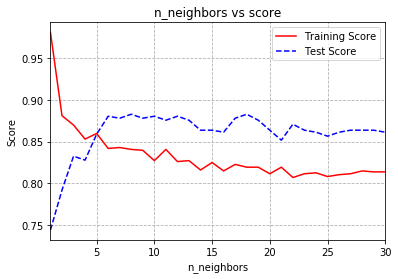

In [19]:
train_score = []
test_score = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled, y_train)
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))
    
plt.plot(np.arange(1, 31), train_score, '-r', label='Training Score')
plt.plot(np.arange(1, 31), test_score, '--b', label='Test Score')
plt.grid(True, linestyle='--')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.xlim(1, 30)
plt.title("n_neighbors vs score")
plt.legend(loc='best');

### GaussianNB

Now we will use GaussianNB, and take a look at first ten predicted values and actual values.

In [20]:
# instantiate the model, no need to use the scaled data
gnb = GaussianNB().fit(X_train, y_train)
# take a look at first 10 predicted values and actual values
print("Predicted values:\n{}".format(gnb.predict(X_test)[:10]))
print("Actual values:\n{}".format(y_test[:10]))

Predicted values:
[0 0 0 0 0 0 1 0 1 0]
Actual values:
[0 1 0 0 1 0 1 0 1 0]


What is accuracy score for training set and test set if we use default settings?

In [21]:
print("Training set score: {}".format(gnb.score(X_train, y_train)))
print("Test set score: {}".format(gnb.score(X_test, y_test)))

Training set score: 0.7890011223344556
Test set score: 0.8014354066985646


Not a pretty good score.

### LogisticRegression

LogisticRegression is our next algorithm to consider; another simple algorithm to start to explore, because of its simplicity and speed. LogisticRegression has a common parameter to tune, which is C. This parameter controls the regularization effect to prevent the model tends to overfit the training set and makes it less generalize to new unseen data. Also there is penalty parameter: L1 and L2 regularization. To start, we use the default settings:

In [22]:
# instantiate the model, no need to use the scaled data
log = LogisticRegression().fit(X_train, y_train)
# take a look at first 10 predicted values and actual values
print("Predicted values:\n{}".format(log.predict(X_test)[:10]))
print("Actual values:\n{}".format(y_test[:10]))

Predicted values:
[0 0 0 0 1 0 1 0 1 0]
Actual values:
[0 1 0 0 1 0 1 0 1 0]


What is accuracy score for training set and test set if we use default settings?

In [23]:
print("Training set score: {}".format(log.score(X_train, y_train)))
print("Test set score: {}".format(log.score(X_test, y_test)))

Training set score: 0.8047138047138047
Test set score: 0.9449760765550239


Tune the C parameter and plot it

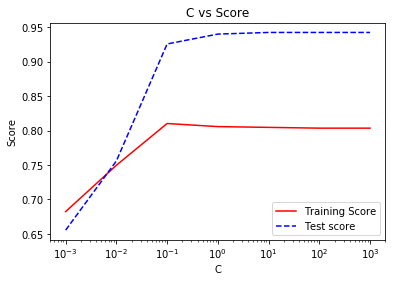

In [24]:
train_score = []
test_score = []

for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    log = LogisticRegression(solver='lbfgs', multi_class='auto', C=c, max_iter=1000000).fit(X_train, y_train)
    train_score.append(log.score(X_train, y_train))
    test_score.append(log.score(X_test, y_test))

plt.plot([0.001, 0.01, 0.1, 1, 10, 100, 1000], train_score, '-r', label='Training Score')
plt.plot([0.001, 0.01, 0.1, 1, 10, 100, 1000], test_score, '--b', label='Test score')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Score')
plt.title('C vs Score')
plt.legend(loc='lower right');

### DecisionTreeClassifier

Now, we enter more advanced region of machine learning algorithms. This time we consider DecisionTreeClassifier, an algorithm that works by asking questions (or we can call it tests) to make classification. We start by default parameter settings.

In [27]:
# instantiate the model, no need to use scaled data
tree = DecisionTreeClassifier().fit(X_train, y_train)
# take a look at first 10 predicted values and actual values
print("Predicted values:\n{}".format(tree.predict(X_test)[:10]))
print("Actual values:\n{}".format(y_test[:10]))

Predicted values:
[0 0 1 1 1 0 0 0 1 0]
Actual values:
[0 1 0 0 1 0 1 0 1 0]


In [28]:
print("Training set score: {}".format(tree.score(X_train, y_train)))
print("Test set score: {}".format(tree.score(X_test, y_test)))

Training set score: 0.9820426487093153
Test set score: 0.7799043062200957


98% accuracy score on training set but only 78% on test, an indication of overfitted model. Now, we control the parameter max_depth to prevent the model overfit the training set. Let's see what happens if we choose max_depth equals three.

In [29]:
tree = DecisionTreeClassifier(max_depth=3, random_state=21).fit(X_train, y_train)
print("Training set score: {}".format(tree.score(X_train, y_train)))
print("Test set score: {}".format(tree.score(X_test, y_test)))

Training set score: 0.8271604938271605
Test set score: 0.9665071770334929


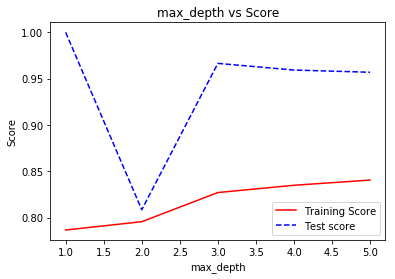

In [30]:
train_score = []
test_score = []

for depth in range(1, 6):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0).fit(X_train, y_train)
    train_score.append(tree.score(X_train, y_train))
    test_score.append(tree.score(X_test, y_test))

plt.plot(range(1, 6), train_score, '-r', label='Training Score')
plt.plot(range(1, 6), test_score, '--b', label='Test score')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('max_depth vs Score')
plt.legend(loc='lower right');

### RandomForestClassifier

In [31]:
# instantiate the model
forest = RandomForestClassifier().fit(X_train, y_train)
# take a look at first 10 predicted values and actual values
print("Predicted values:\n{}".format(forest.predict(X_test)[:10]))
print("Actual values:\n{}".format(y_test[:10]))

Predicted values:
[0 0 0 1 0 0 0 0 1 0]
Actual values:
[0 1 0 0 1 0 1 0 1 0]


In [32]:
print("Training set score: {}".format(forest.score(X_train, y_train)))
print("Test set score: {}".format(forest.score(X_test, y_test)))

Training set score: 0.9607182940516273
Test set score: 0.7870813397129187


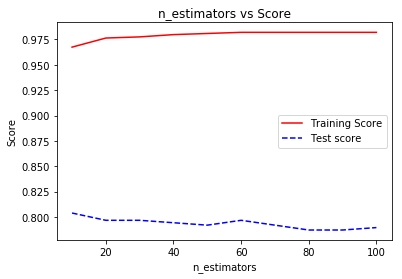

In [33]:
train_score = []
test_score = []

for estimators in np.arange(10, 110, 10):
    rfc = RandomForestClassifier(n_estimators=estimators, random_state=0).fit(X_train, y_train)
    train_score.append(rfc.score(X_train, y_train))
    test_score.append(rfc.score(X_test, y_test))
    
plt.plot(np.arange(10, 110, 10), train_score, '-r', label='Training Score')
plt.plot(np.arange(10, 110, 10), test_score, '--b', label='Test score')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('n_estimators vs Score')
plt.legend(loc='best');

### GradientBoostingClassifier

In [34]:
# instantiate the model
gbrt = GradientBoostingClassifier().fit(X_train, y_train)
# take a look at first 10 predicted values and actual values
print("Predicted values:\n{}".format(gbrt.predict(X_test)[:10]))
print("Actual values:\n{}".format(y_test[:10]))

Predicted values:
[0 0 0 0 0 0 1 0 1 0]
Actual values:
[0 1 0 0 1 0 1 0 1 0]


In [35]:
# training set score and test set score
print("Training set score: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gbrt.score(X_test, y_test)))

Training set score: 0.893
Test set score: 0.897


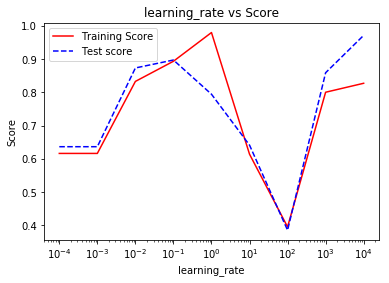

In [36]:
train_score = []
test_score = []

for rate in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    gbrt = GradientBoostingClassifier(learning_rate=rate, random_state=0).fit(X_train, y_train)
    train_score.append(gbrt.score(X_train, y_train))
    test_score.append(gbrt.score(X_test, y_test))

plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], train_score, '-r', label='Training Score')
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], test_score, '--b', label='Test score')
plt.xscale('log')
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.title('learning_rate vs Score')
plt.legend(loc='best');

### SVC

In [37]:
# instantiate the model, we use the scaled data
svc = SVC().fit(X_train_scaled, y_train)
print("First ten predicted values:\n{}".format(svc.predict(X_test_scaled)[:10]))
print("First ten test set values:\n{}".format(y_test[:10]))

First ten predicted values:
[0 0 0 0 0 0 1 0 1 0]
First ten test set values:
[0 1 0 0 1 0 1 0 1 0]


In [38]:
# training set score and test set score
print("Training set score: {:.3f}".format(svc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svc.score(X_test, y_test)))

Training set score: 0.618
Test set score: 0.636
